# EDA sopotify 


In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [90]:
data = pd.read_csv("../data/0_raw/spotify_dataset.csv", sep=",", encoding="utf-8")
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [91]:
data.shape

(114000, 21)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [93]:
print(data.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


mostar lass filas en las que hace falta los datos 

In [94]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


hayd datos duplicados ?

In [95]:
data[data.duplicated(keep=False)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [96]:
print(data.describe(include="object"))

                      track_id      artists                  album_name  \
count                   114000       113999                      113999   
unique                   89741        31437                       46589   
top     6S3JlDAGk3uu3NtZbPnuhS  The Beatles  Alternative Christmas 2022   
freq                         9          279                         195   

             track_name track_genre  
count            113999      114000  
unique            73608         114  
top     Run Rudolph Run    acoustic  
freq                151        1000  


In [97]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64'])


for col in numerical_cols:
    print(f"\n--- Handling Outliers for {col} ---")

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    print(f"Number of Outliers: {len(outliers)}")





--- Handling Outliers for Unnamed: 0 ---
Number of Outliers: 0
Outliers handled using capping/flooring.

--- Handling Outliers for popularity ---
Number of Outliers: 2
Outliers handled using capping/flooring.

--- Handling Outliers for duration_ms ---
Number of Outliers: 5617
Outliers handled using capping/flooring.

--- Handling Outliers for danceability ---
Number of Outliers: 620
Outliers handled using capping/flooring.

--- Handling Outliers for energy ---
Number of Outliers: 0
Outliers handled using capping/flooring.

--- Handling Outliers for key ---
Number of Outliers: 0
Outliers handled using capping/flooring.

--- Handling Outliers for loudness ---
Number of Outliers: 6173
Outliers handled using capping/flooring.

--- Handling Outliers for mode ---
Number of Outliers: 0
Outliers handled using capping/flooring.

--- Handling Outliers for speechiness ---
Number of Outliers: 13211
Outliers handled using capping/flooring.

--- Handling Outliers for acousticness ---
Number of Outl

#### colcusiones 


## visualizations:

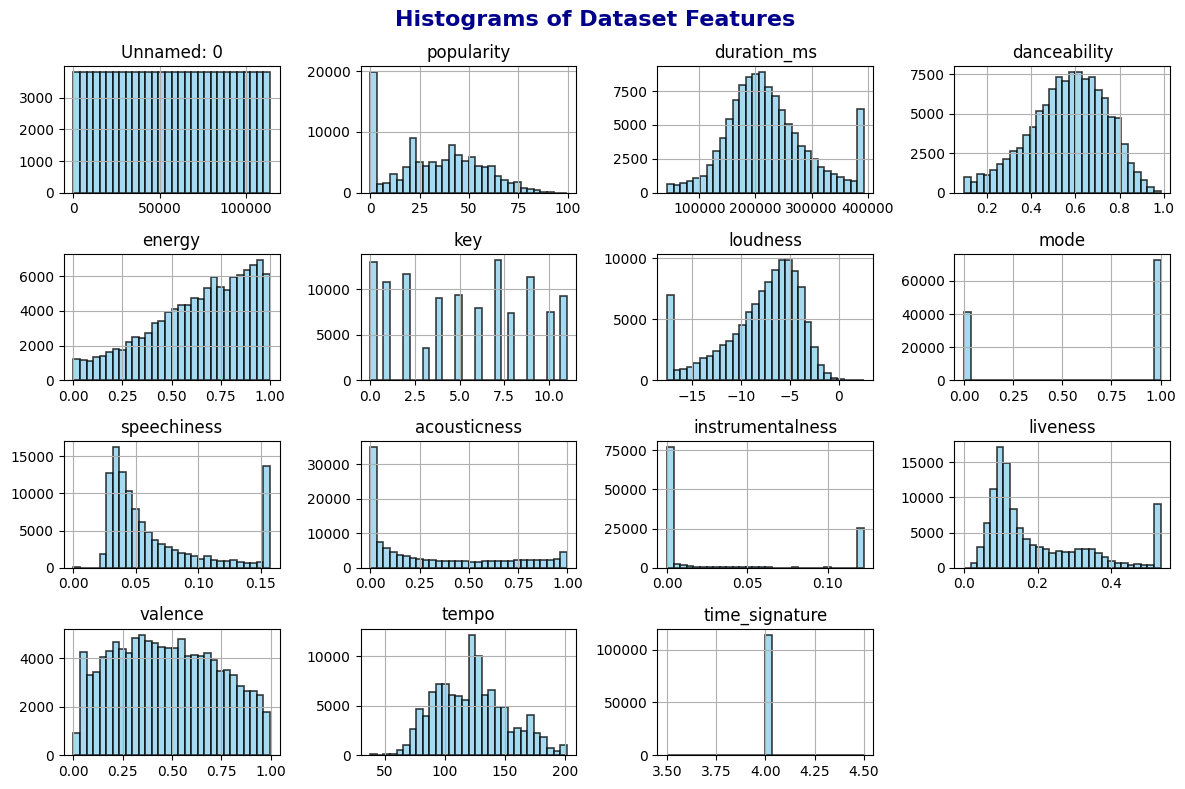

In [99]:
data.hist(figsize=(12, 8), bins=30, color="skyblue", edgecolor="black", alpha=0.75, grid=True, linewidth=1.2)
plt.suptitle("Histograms of Dataset Features", fontsize=16, fontweight="bold", color="darkblue")
plt.tight_layout()

plt.show()

/tmp/ipykernel_1989/1118385827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=artists_ten_count.values, y=artists_ten_count.index, palette="viridis")


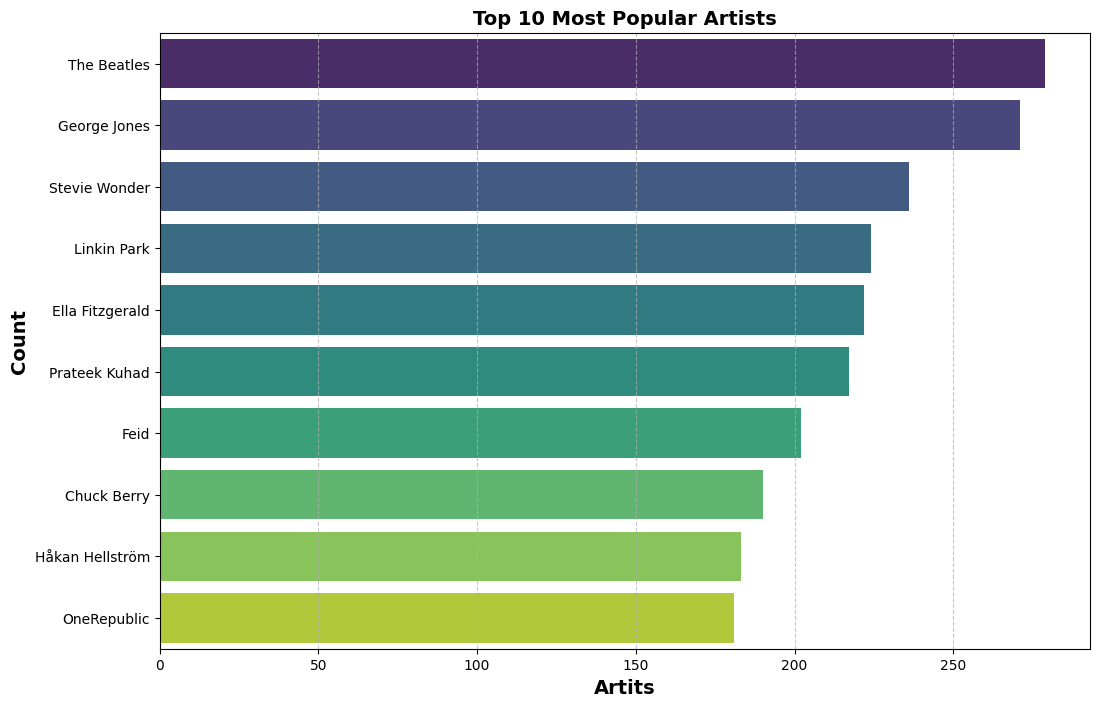

In [100]:
artists_ten_count = data["artists"].value_counts().head(10)

plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x=artists_ten_count.values, y=artists_ten_count.index, palette="viridis")

x_limit = ax.get_xlim()[1]

for index, value in enumerate(artists_ten_count.values):
    plt.Text(value, index, f"{value}", va ="center", ha="left", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Most Popular Artists", fontsize=14, fontweight="bold")
plt.xlabel("Artits", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

/tmp/ipykernel_1989/1726730011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=album_name_ten_count.values, y=album_name_ten_count.index, palette="viridis")


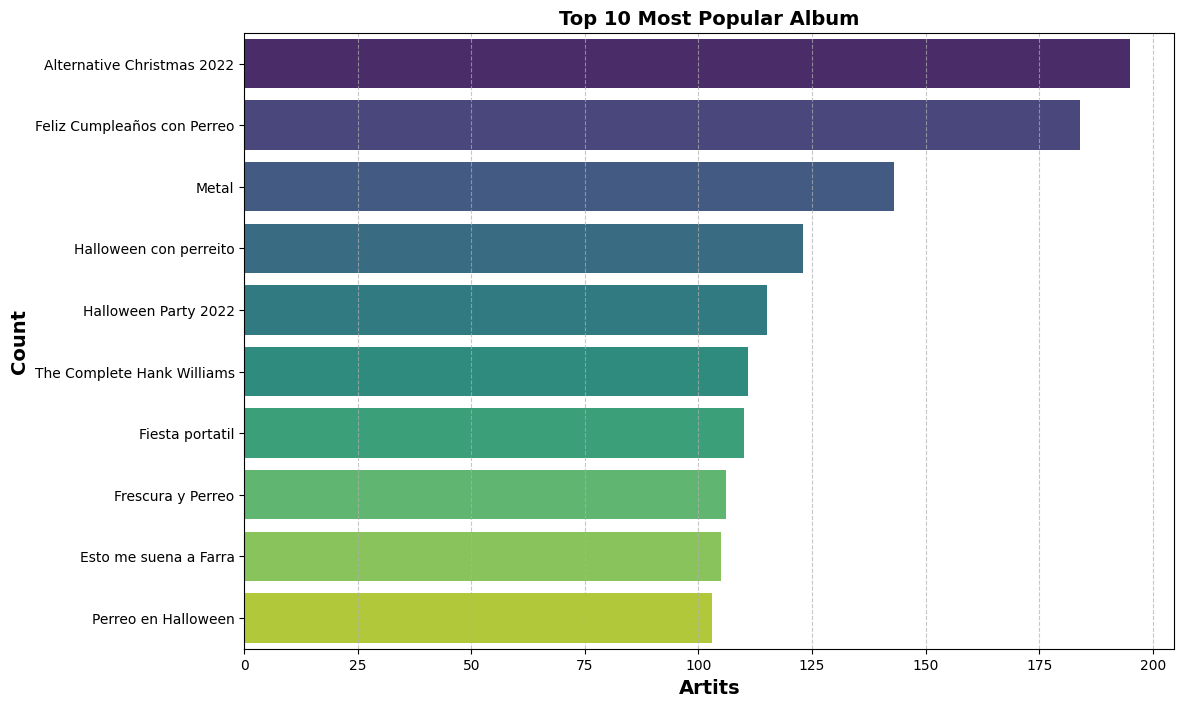

In [101]:
album_name_ten_count = data["album_name"].value_counts().head(10)

plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x=album_name_ten_count.values, y=album_name_ten_count.index, palette="viridis")

x_limit = ax.get_xlim()[1]

for index, value in enumerate(album_name_ten_count.values):
    plt.Text(value, index, f"{value}", va ="center", ha="left", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Most Popular Album", fontsize=14, fontweight="bold")
plt.xlabel("Artits", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

/tmp/ipykernel_1989/3858102546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=track_name_ten_count.values, y=track_name_ten_count.index, palette="viridis")


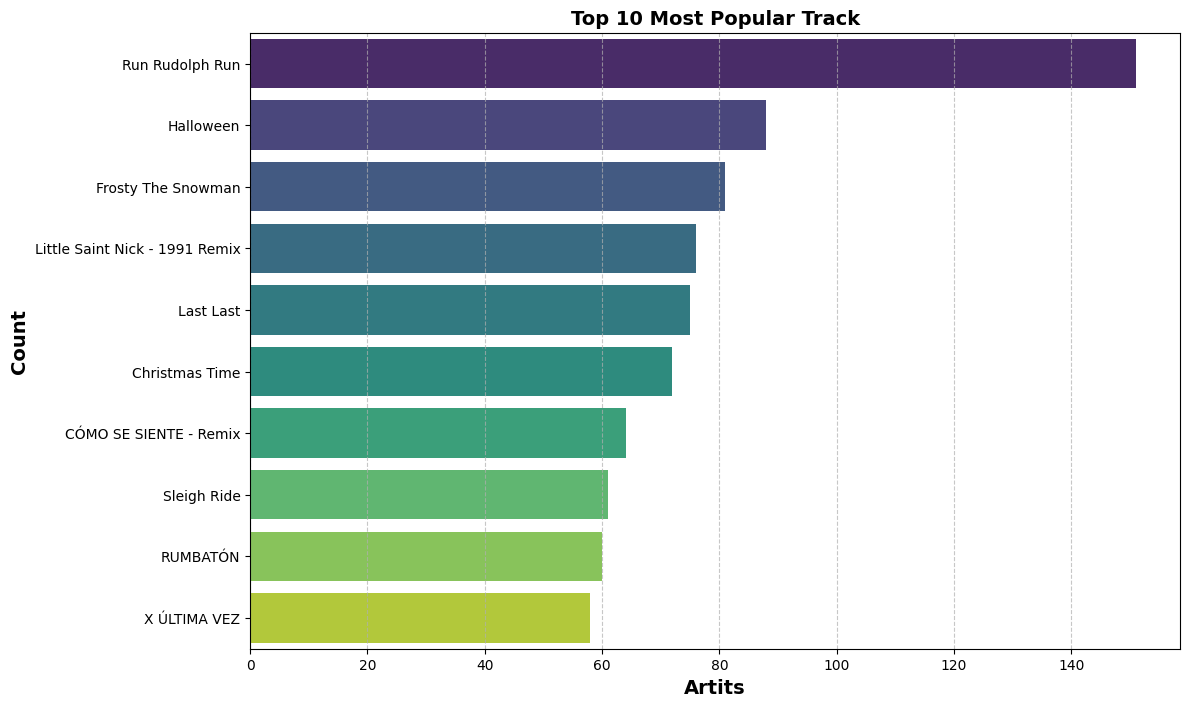

In [102]:
track_name_ten_count = data["track_name"].value_counts().head(10)

plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x=track_name_ten_count.values, y=track_name_ten_count.index, palette="viridis")

x_limit = ax.get_xlim()[1]

for index, value in enumerate(track_name_ten_count.values):
    plt.Text(value, index, f"{value}", va ="center", ha="left", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Most Popular Track", fontsize=14, fontweight="bold")
plt.xlabel("Artits", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

/tmp/ipykernel_1989/2561168816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=track_genre_ten_count.values, y=track_genre_ten_count.index, palette="viridis")


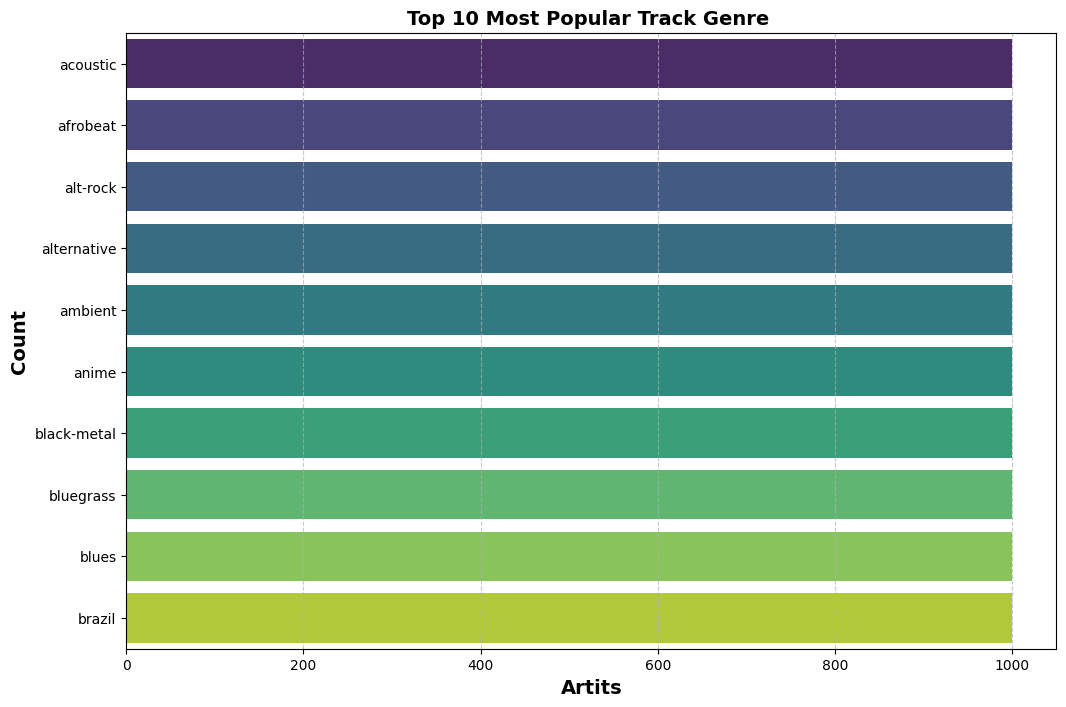

In [103]:
track_genre_ten_count = data["track_genre"].value_counts().head(10)

plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x=track_genre_ten_count.values, y=track_genre_ten_count.index, palette="viridis")

x_limit = ax.get_xlim()[1]

for index, value in enumerate(track_genre_ten_count.values):
    plt.Text(value, index, f"{value}", va ="center", ha="left", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Most Popular Track Genre ", fontsize=14, fontweight="bold")
plt.xlabel("Artits", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

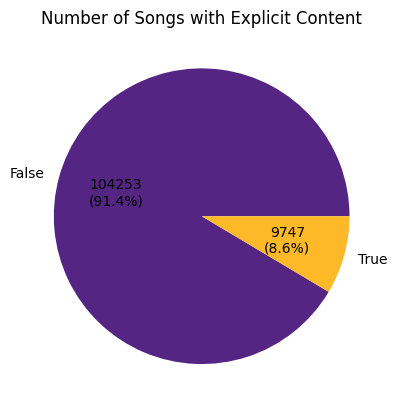

In [104]:
explicit = data["explicit"].value_counts()

def func(pct, all_vals):
    absolute =  int(round(pct/100. *sum(all_vals)))
    return f"{absolute}\n({pct:.1f}%)"

plt.Figure(figsize=(12, 8))
plt.pie(explicit, labels = explicit.index, autopct=lambda pct: func(pct, explicit), colors=["#552583", "#FDB927",])
plt.title("Number of Songs with Explicit Content")
plt.show()

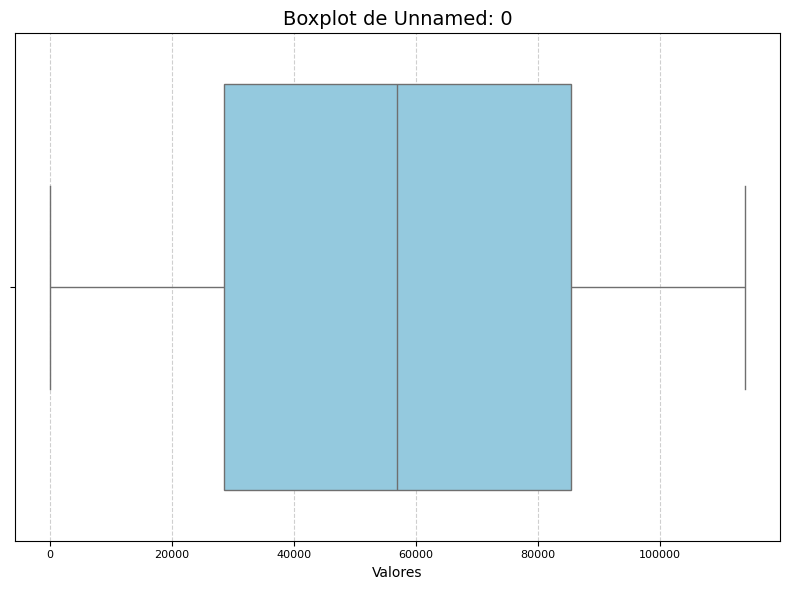


--- Handling Outliers for Unnamed: 0 ---
Number of Outliers: 0


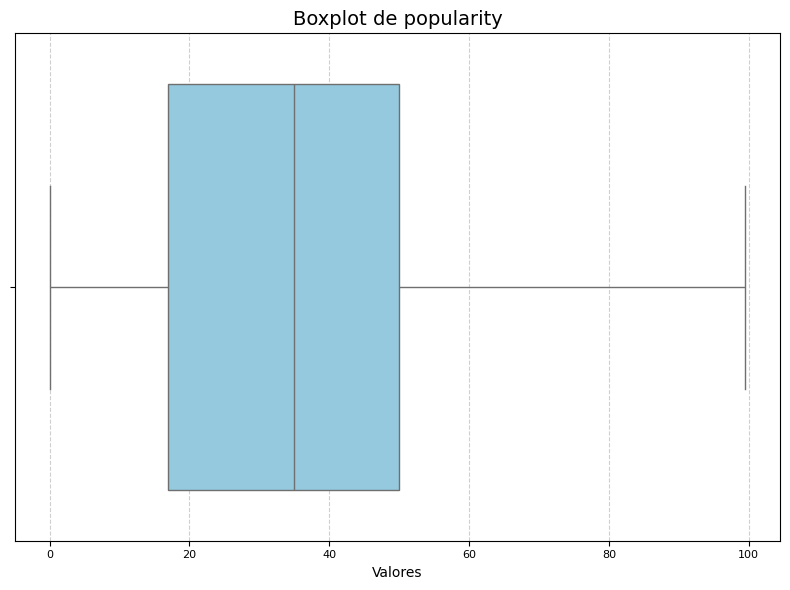


--- Handling Outliers for popularity ---
Number of Outliers: 0


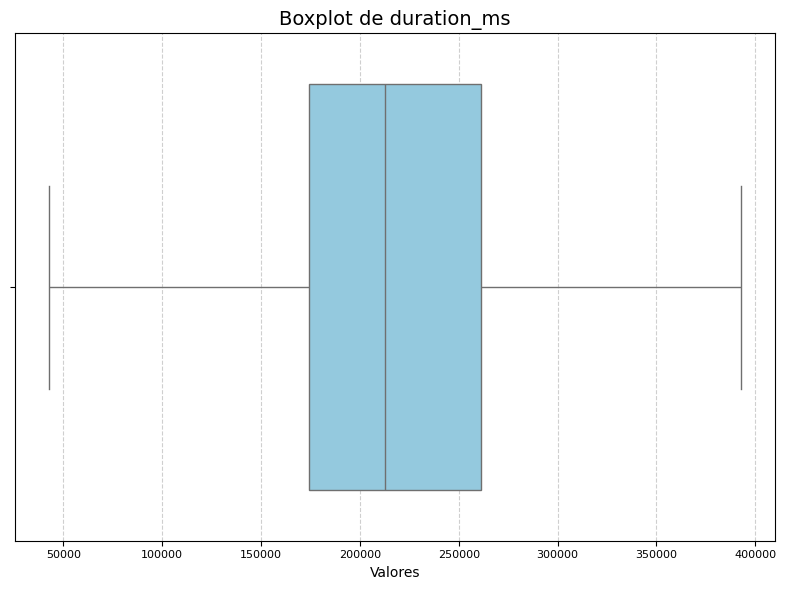


--- Handling Outliers for duration_ms ---
Number of Outliers: 0


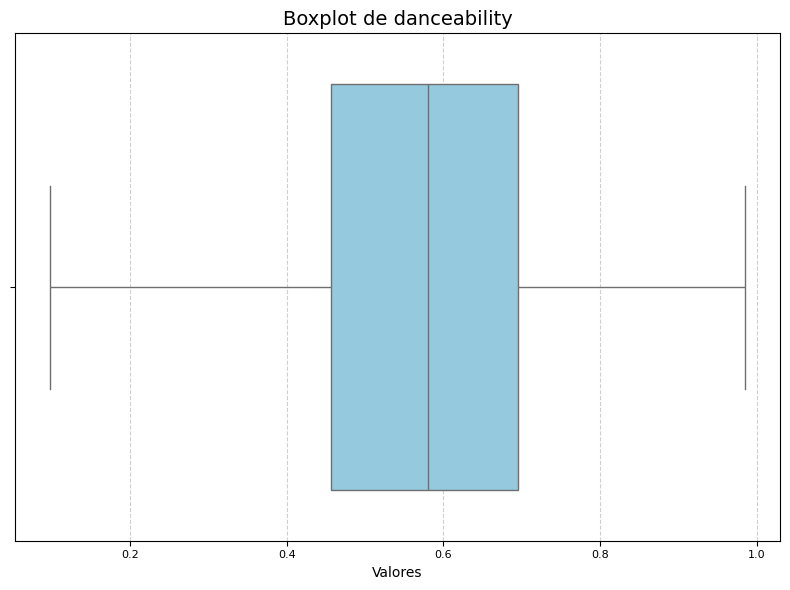


--- Handling Outliers for danceability ---
Number of Outliers: 0


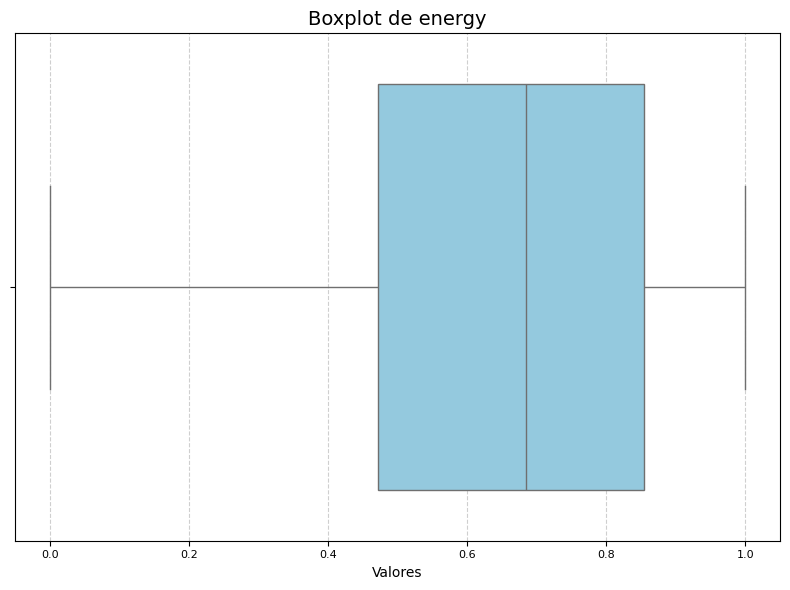


--- Handling Outliers for energy ---
Number of Outliers: 0


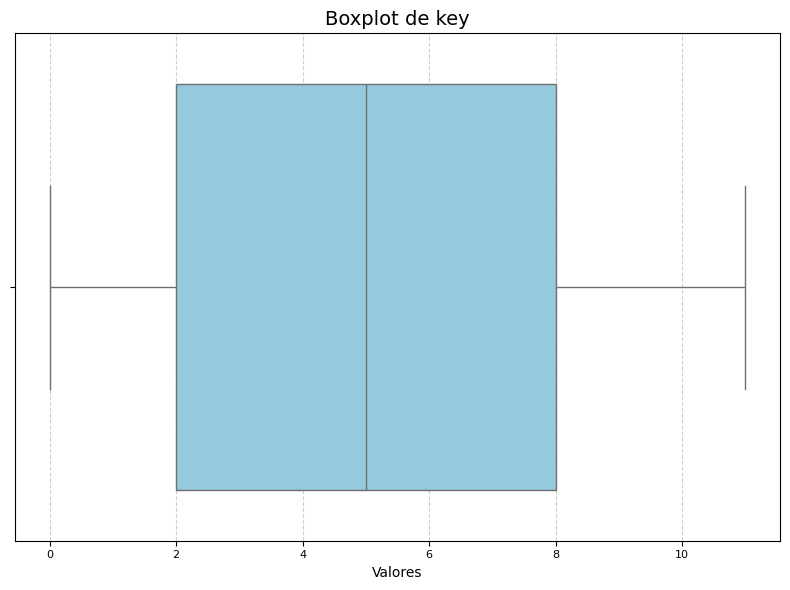


--- Handling Outliers for key ---
Number of Outliers: 0


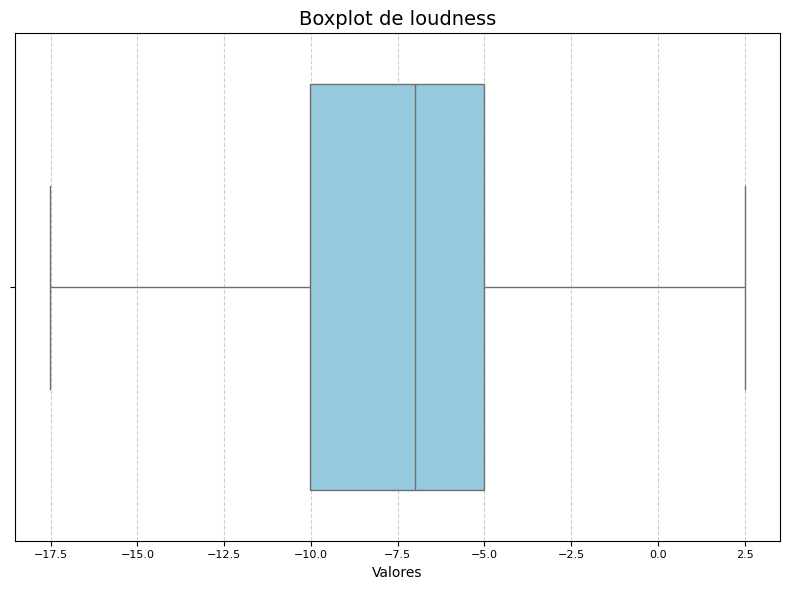


--- Handling Outliers for loudness ---
Number of Outliers: 0


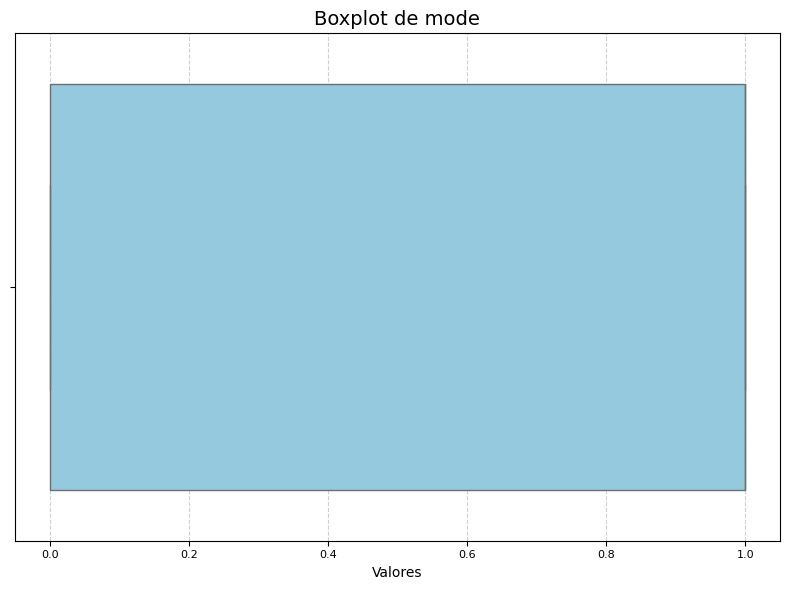


--- Handling Outliers for mode ---
Number of Outliers: 0


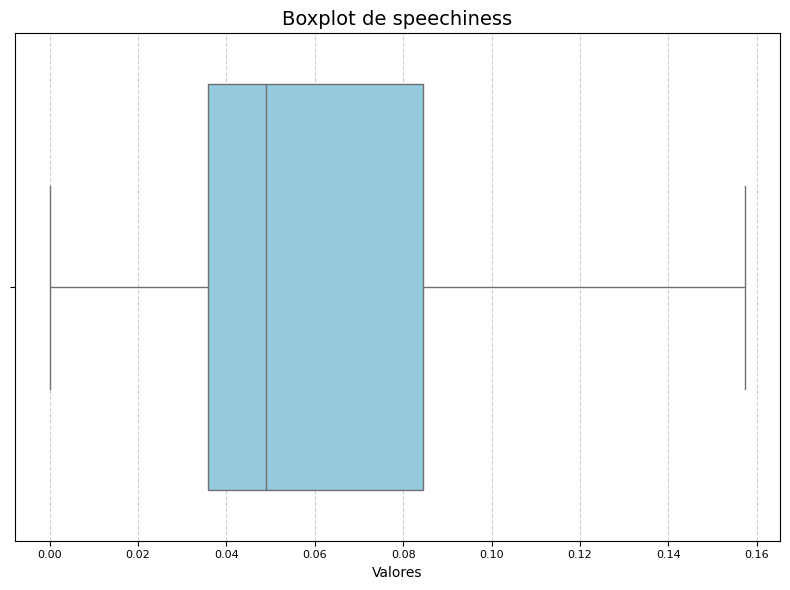


--- Handling Outliers for speechiness ---
Number of Outliers: 0


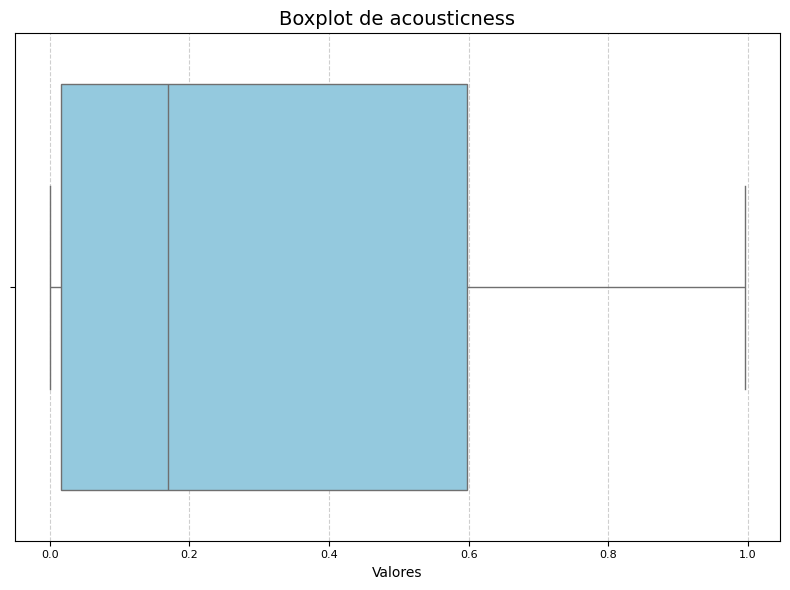


--- Handling Outliers for acousticness ---
Number of Outliers: 0


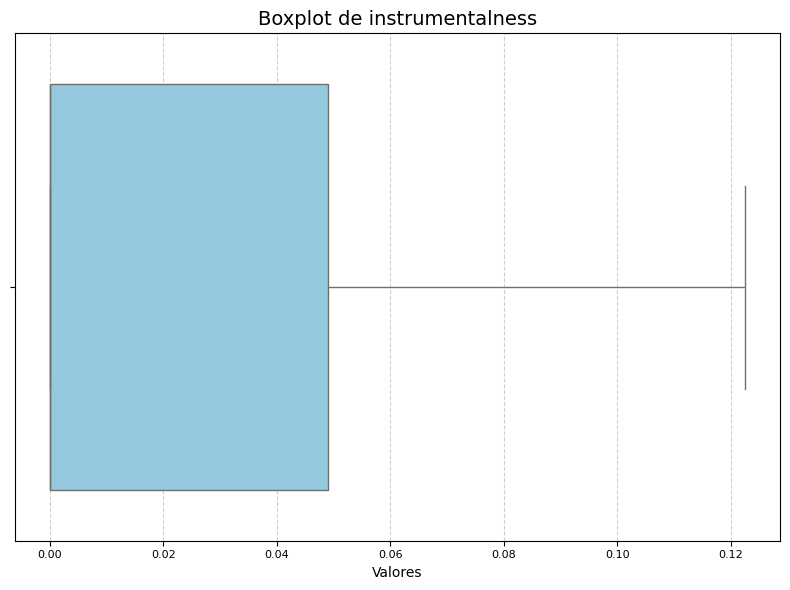


--- Handling Outliers for instrumentalness ---
Number of Outliers: 0


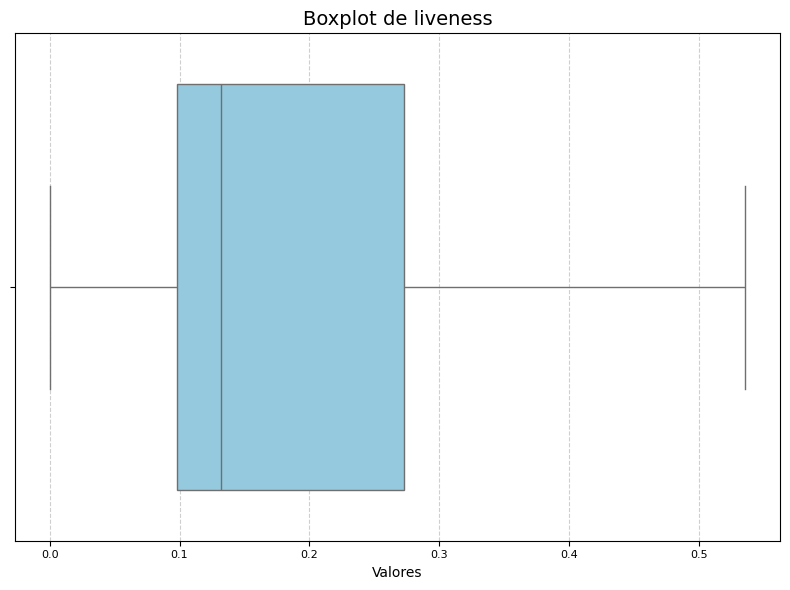


--- Handling Outliers for liveness ---
Number of Outliers: 0


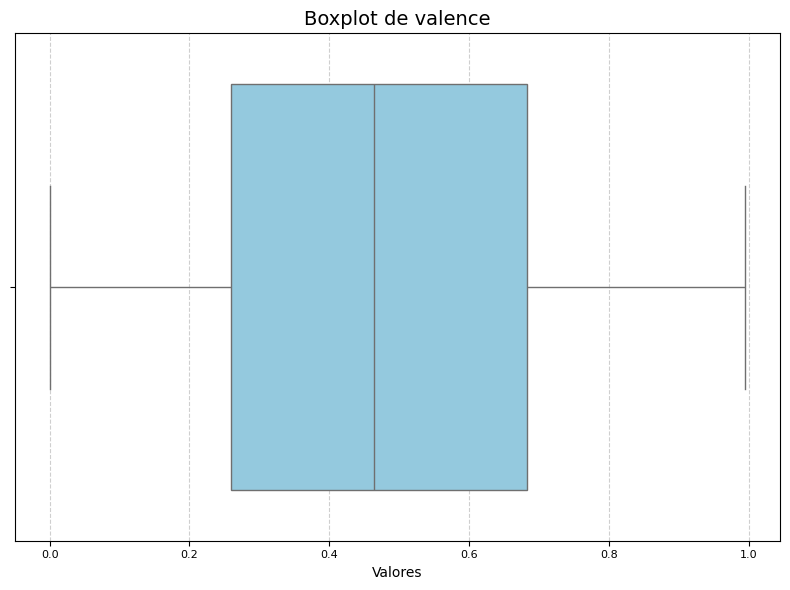


--- Handling Outliers for valence ---
Number of Outliers: 0


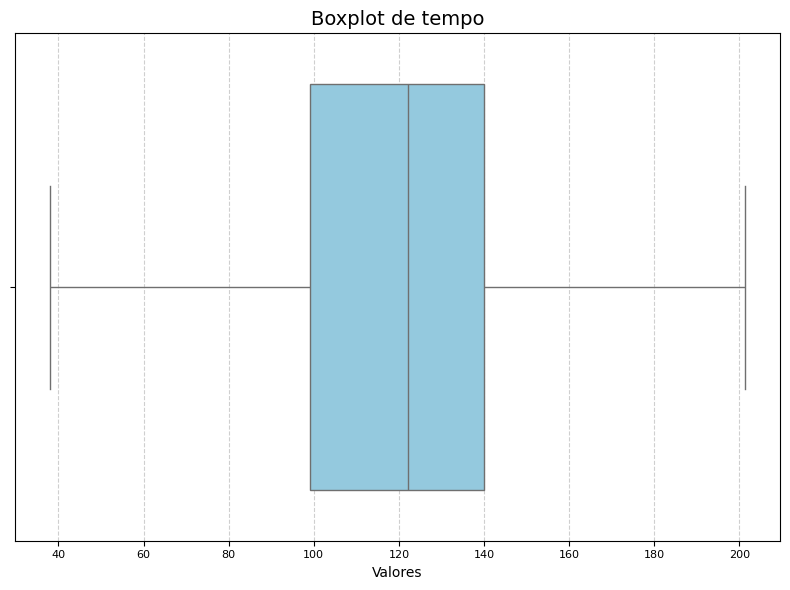


--- Handling Outliers for tempo ---
Number of Outliers: 0


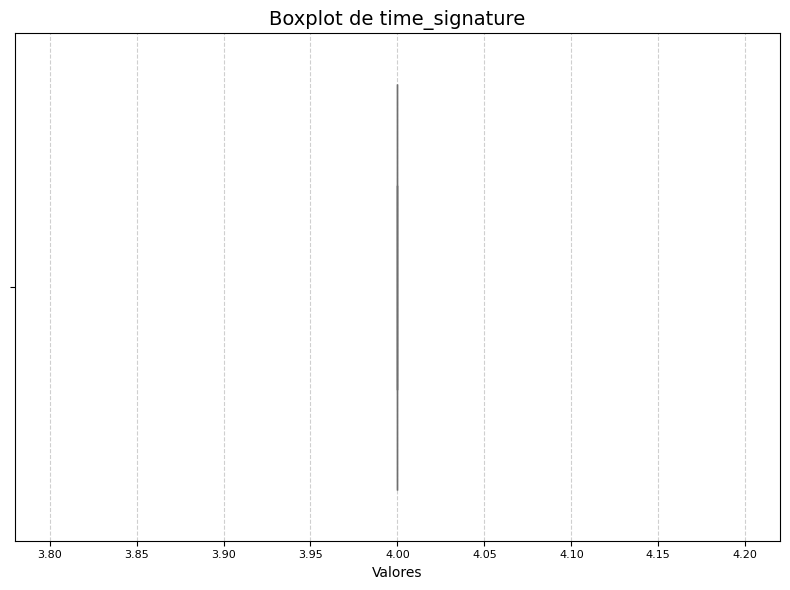


--- Handling Outliers for time_signature ---
Number of Outliers: 0


In [105]:

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col], color='skyblue')  
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel('Valores', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    print(f"\n--- Handling Outliers for {col} ---")

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    print(f"Number of Outliers: {len(outliers)}")

